# FP Algorithm

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import pandas as pd

In [3]:
dataset = [['milk', 'onion','nutmeg','kidney beans', 'eggs','yogurt'], ['milk','onion','nutmeg','kidney beans','eggs', 'yogurt'], ['milk','apple','kidney beans','eggs'],['milk','corn','kidney beans','yogurt'],['corn','onion','kidney beans','ice cream','yogurt']]

In [4]:
Te = TransactionEncoder()
Te_array = Te.fit(dataset).transform(dataset)
Te_array

array([[False, False,  True, False,  True,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True,  True,  True,  True],
       [ True, False,  True, False,  True,  True, False, False, False],
       [False,  True, False, False,  True,  True, False, False,  True],
       [False,  True, False,  True,  True, False, False,  True,  True]])

In [5]:
df = pd.DataFrame(Te_array, columns = Te.columns_)
df

,apple,corn,eggs,ice cream,kidney beans,milk,nutmeg,onion,yogurt
0,False,False,True,False,True,True,True,True,True
1,False,False,True,False,True,True,True,True,True
2,True,False,True,False,True,True,False,False,False
3,False,True,False,False,True,True,False,False,True
4,False,True,False,True,True,False,False,True,True


In [6]:
fpgrowth(df, min_support = 0.6, use_colnames = True)

,support,itemsets
0,1.0,(kidney beans)
1,0.8,(yogurt)
2,0.8,(milk)
3,0.6,(onion)
4,0.6,(eggs)
5,0.8,"(kidney beans, yogurt)"
6,0.8,"(kidney beans, milk)"
7,0.6,"(milk, yogurt)"
8,0.6,"(milk, kidney beans, yogurt)"
9,0.6,"(yogurt, onion)"


# CURE Algorithm

In [7]:
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.cure import cure 
from pyclustering.samples.definitions import FCPS_SAMPLES

In [8]:
input_data = read_sample(FCPS_SAMPLES.SAMPLE_LSUN)
input_data

[[2.0, 3.0],
 [0.387577, 0.268546],
 [0.17678, 0.582963],
 [3.277701, 0.814082],
 [0.387577, 0.17678],
 [0.268546, 0.582963],
 [2.031145, 0.244597],
 [0.188677, 0.46128],
 [3.525472, 0.265579],
 [2.229583, 0.682189],
 [3.392074, 0.420976],
 [3.589815, 0.832527],
 [1.227873, 0.810909],
 [1.300699, 0.146538],
 [3.596968, 0.421791],
 [3.106757, 0.779664],
 [0.221139, 0.612603],
 [1.496841, 0.495985],
 [2.860498, 0.535719],
 [1.45071, 0.142352],
 [1.745799, 0.066373],
 [1.4048, 0.32968],
 [1.7696, 0.777809],
 [0.464511, 0.672442],
 [2.750803, 0.16552],
 [1.571006, 0.091428],
 [1.18166, 0.857799],
 [0.661957, 0.612812],
 [0.828567, 0.798048],
 [3.313914, 0.216602],
 [3.625645, 0.538592],
 [3.611238, 0.584716],
 [2.904519, 0.465036],
 [3.080431, 0.24549],
 [3.851167, 0.574214],
 [0.944956, 0.077006],
 [3.834215, 0.224878],
 [2.179064, 0.784896],
 [2.716449, 0.944268],
 [0.02978, 0.931252],
 [0.095525, 0.349743],
 [3.835506, 0.889721],
 [1.142732, 0.811691],
 [3.747439, 0.654886],
 [0.948862,

In [9]:
cluster_instance = cure(input_data, 3)
cluster_instance.process()
clusters = cluster_instance.get_clusters()

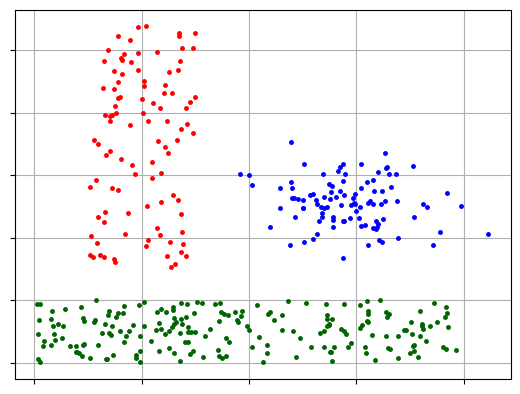

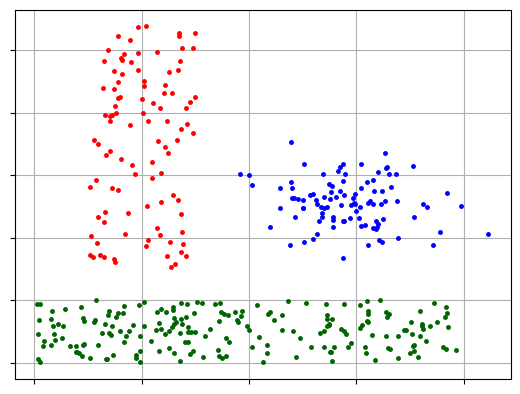

In [14]:
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, input_data)
visualizer.show()

# BIRCH Algorithm

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

In [18]:
dataset, clusters = make_blobs(n_samples = 600, centers = 8, cluster_std = 0.75, random_state = 0)

In [19]:
model = Birch(branching_factor = 50,n_clusters = None,threshold = 1.5)

In [20]:
model.fit(dataset)

Birch(n_clusters=None, threshold=1.5)

In [21]:
pred = model.predict(dataset)

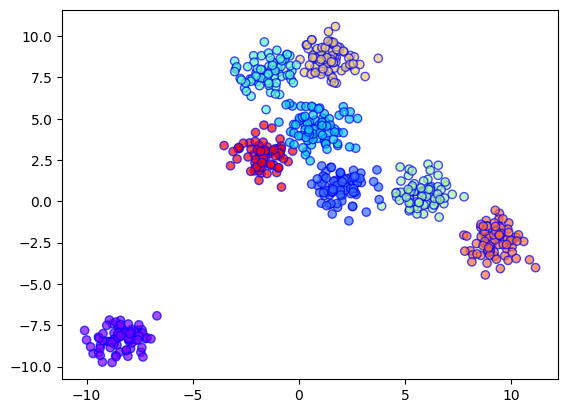

In [23]:
plt.scatter(dataset[:,0], dataset[:,1], alpha = 0.7, cmap = 'rainbow', edgecolors = 'b', c = pred)
plt.show()

# Bloom Filter

In [25]:
class SimpleBloomFilter:
    def __init__(self, size = 1000, hash_count = 3):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = [0] * size
    
    def add(self, item):
        hashes = [(hash(item) + i) % self.size for i in range(self.hash_count) ]
        for h in hashes:
            self.bit_array[h] = 1

    def check(self, item):
        hashes = [(hash(item) + i) % self.size for i in range(self.hash_count)]
        return all(self.bit_array[h] for h in hashes)
    
bloom = SimpleBloomFilter()
bloom.add("hello")
bloom.check("hello")
bloom.check("world")

False